<a href="https://colab.research.google.com/github/ykato27/Object-Detection/blob/main/SAHI_Inference_for_YOLOv5_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Preperation

- Install latest version of SAHI and YOLOv5:

In [1]:
!pip install -U torch sahi yolov5 imantics fiftyone >> /dev/null

In [2]:
import os
import torch
os.getcwd()

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

- Import required modules:

In [3]:
# arrange an instance segmentation model for test
from sahi.utils.yolov5 import (
    download_yolov5s6_model,
)

# import required functions, classes
from sahi.model import Yolov5DetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download a yolov5 model and two test images:

In [4]:
# download YOLOV5S6 model to 'models/yolov5s6.pt'
yolov5_model_path = 'models/yolov5s6.pt'
download_yolov5s6_model(destination_path=yolov5_model_path)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv5 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [5]:
detection_model = Yolov5DetectionModel(
    model_path=yolov5_model_path,
    confidence_threshold=0.3,
    device=device,
)

12/03/2021 11:01:52 - INFO - yolov5.models.yolo -   
                 from  n    params  module                                  arguments                     
12/03/2021 11:01:52 - INFO - yolov5.models.yolo -     0                -1  1      3520  yolov5.models.common.Focus              [3, 32, 3]                    
12/03/2021 11:01:52 - INFO - yolov5.models.yolo -     1                -1  1     18560  yolov5.models.common.Conv               [32, 64, 3, 2]                
12/03/2021 11:01:52 - INFO - yolov5.models.yolo -     2                -1  1     18816  yolov5.models.common.C3                 [64, 64, 1]                   
12/03/2021 11:01:52 - INFO - yolov5.models.yolo -     3                -1  1     73984  yolov5.models.common.Conv               [64, 128, 3, 2]               
12/03/2021 11:01:52 - INFO - yolov5.models.yolo -     4                -1  3    156928  yolov5.models.common.C3                 [128, 128, 3]                 
12/03/2021 11:01:52 - INFO - yolov5.models.yo

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [6]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [7]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


- Visualize predicted bounding boxes and masks over the original image:

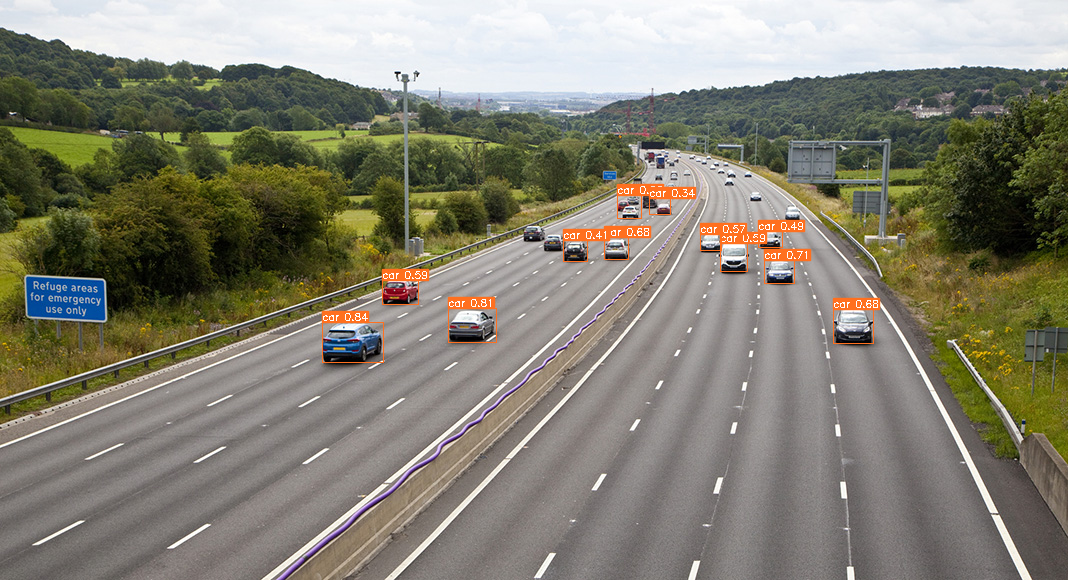

In [8]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv5 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [9]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Number of slices: 15


/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr

- Visualize predicted bounding boxes and masks over the original image:

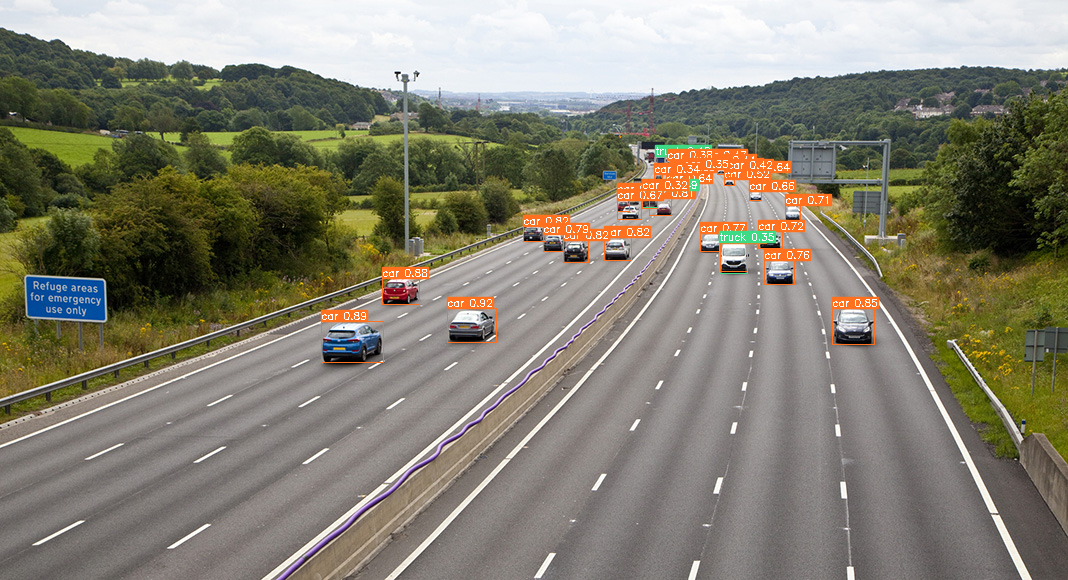

In [10]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [11]:
object_prediction_list = result.object_prediction_list

In [12]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(447, 308, 496, 342), w: 49, h: 34>,
    mask: None,
    score: PredictionScore: <value: 0.9154329299926758>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [13]:
result.to_coco_annotations()[:3]

[{'area': 1666,
  'bbox': [447, 308, 49, 34],
  'category_id': 2,
  'category_name': 'car',
  'image_id': None,
  'iscrowd': 0,
  'score': 0.9154329299926758,
  'segmentation': []},
 {'area': 2542,
  'bbox': [321, 321, 62, 41],
  'category_id': 2,
  'category_name': 'car',
  'image_id': None,
  'iscrowd': 0,
  'score': 0.8879777193069458,
  'segmentation': []},
 {'area': 962,
  'bbox': [382, 278, 37, 26],
  'category_id': 2,
  'category_name': 'car',
  'image_id': None,
  'iscrowd': 0,
  'score': 0.8796822428703308,
  'segmentation': []}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [14]:
result.to_coco_predictions(image_id=1)[:3]

[{'area': 1666,
  'bbox': [447, 308, 49, 34],
  'category_id': 2,
  'category_name': 'car',
  'image_id': 1,
  'iscrowd': 0,
  'score': 0.9154329299926758,
  'segmentation': []},
 {'area': 2542,
  'bbox': [321, 321, 62, 41],
  'category_id': 2,
  'category_name': 'car',
  'image_id': 1,
  'iscrowd': 0,
  'score': 0.8879777193069458,
  'segmentation': []},
 {'area': 962,
  'bbox': [382, 278, 37, 26],
  'category_id': 2,
  'category_name': 'car',
  'image_id': 1,
  'iscrowd': 0,
  'score': 0.8796822428703308,
  'segmentation': []}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [15]:
result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [16]:
result.to_fiftyone_detections()[:3]

ServiceListenTimeout: ignored

## 4. Batch Prediction

- Set model and directory parameters:

In [17]:
model_type = "yolov5"
model_path = yolov5_model_path
model_device = device
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [18]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder .

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  yolov5.models.common.Focus              [3, 32, 3]                    
  1                -1  1     18560  yolov5.models.common.Conv               [32, 64, 3, 2]                
  2                -1  1     18816  yolov5.models.common.C3                 [64, 64, 1]                   
  3                -1  1     73984  yolov5.models.common.Conv               [64, 128, 3, 2]               
  4                -1  3    156928  yolov5.models.common.C3                 [128, 128, 3]                 
  5                -1  1    295424  yolov5.models.common.Conv               [128, 256, 3, 2]              
  6                -1  3    625152  yolov5.models.common.C3                 [256, 256, 3]                 
  7                -1  1    885504  yolov5.models.common.Conv               [256, 384, 3, 2]              

  0%|          | 0/3 [00:00<?, ?it/s]

Number of slices: 15


/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr

Number of slices: 15


/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr

Number of slices: 20


/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr

Model loaded in 0.852318525314331 seconds.
Slicing performed in 0.05397391319274902 seconds.
Prediction performed in 23.839996337890625 seconds.
